In [10]:
# Imports
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# processed data ~200 Mb
data = pd.read_csv('processed.csv')

In [88]:
data.shape[0]

1438604

In [64]:
# testing everything before doing it to whole data
playdata = data[0:100]
playdata

,Unnamed: 0,timestamp,text
0,2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
1,10,2019-05-27 11:49:19+00,One of the useful articles of Stefan; here is ...
2,11,2019-05-21 16:49:45+00,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi..."
3,12,2019-05-22 12:42:16+00,BestMixer has been seized by the Dutch Police ...
4,13,2019-05-27 11:49:30+00,Invested my Life Savings into Bitcoin and Ethe...
...,...,...,...
95,387,2019-05-27 11:53:35+00,#Binance #1 Biggest #Crypto Exchange in World ...
96,389,2019-05-26 13:30:50+00,New video is now up\n\nOverview of trade strat...
97,390,2019-05-27 04:08:46+00,After using it for a few days since launch (ye...
98,391,2019-05-27 00:32:43+00,#Bitcoin doesn’t care who said what or who was...


In [65]:
playdata['timestamp'][1]
playdata = playdata.drop(['Unnamed: 0'], axis = 1)

In [66]:
playdata['timestamp'] = pd.to_datetime(playdata['timestamp'])

In [67]:
playdata['timestamp'].head()
pdata = playdata
pdata = pdata.drop(['text'], axis = 1)
pdata['test']  = range(len(pdata))
pdata

,timestamp,test
0,2019-05-27 11:49:06+00:00,0
1,2019-05-27 11:49:19+00:00,1
2,2019-05-21 16:49:45+00:00,2
3,2019-05-22 12:42:16+00:00,3
4,2019-05-27 11:49:30+00:00,4
...,...,...
95,2019-05-27 11:53:35+00:00,95
96,2019-05-26 13:30:50+00:00,96
97,2019-05-27 04:08:46+00:00,97
98,2019-05-27 00:32:43+00:00,98


In [68]:
# grouping them by week https://newbedev.com/group-by-week-in-pandas
pdata['timestamp'] = pd.to_datetime(pdata['timestamp']) - pd.to_timedelta(7, unit='d')
df = pdata.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')

In [69]:
df

,timestamp,test
0,2009-01-05 00:00:00+00:00,10.000000
1,2009-01-12 00:00:00+00:00,NaN
2,2009-01-19 00:00:00+00:00,NaN
3,2009-01-26 00:00:00+00:00,NaN
4,2009-02-02 00:00:00+00:00,NaN
...,...,...
537,2019-04-22 00:00:00+00:00,NaN
538,2019-04-29 00:00:00+00:00,33.000000
539,2019-05-06 00:00:00+00:00,67.500000
540,2019-05-13 00:00:00+00:00,54.000000


In [70]:
#evaluating sentiment with vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pdata = data[0:100]
testsen = pdata["text"][2]
side_obj = SentimentIntensityAnalyzer()
def sentiment_scores(x):
    y = side_obj.polarity_scores(x)
    return y["compound"]
# compound score > 0.05 = positive sentiment; compound score < -0.05 = negative sentiment; else neutral sentiment
sensco = np.zeros(len(pdata))
for i in range(100):
    sensco[i] = sentiment_scores(pdata["text"][i])

In [71]:
sensco

array([ 0.    ,  0.4404,  0.926 ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.8472, -0.875 ,  0.    ,  0.    , -0.6956, -0.2732,
        0.9413,  0.5095,  0.    ,  0.2732,  0.6249,  0.    , -0.2023,
        0.7717,  0.7579,  0.    ,  0.68  , -0.7496, -0.2732,  0.    ,
        0.5106,  0.    ,  0.    ,  0.5859,  0.    ,  0.8316,  0.4767,
        0.2263,  0.8316,  0.4588,  0.0258,  0.7968,  0.5229,  0.    ,
        0.    ,  0.4215,  0.    ,  0.7964,  0.    ,  0.2023,  0.392 ,
        0.9526,  0.9611,  0.9385, -0.4078,  0.9633,  0.9445,  0.87  ,
        0.    , -0.5994,  0.6369,  0.7964,  0.    ,  0.6124,  0.4926,
        0.    ,  0.    ,  0.8481, -0.2263,  0.0772,  0.    , -0.4356,
        0.    ,  0.3392,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.9468,  0.9118,  0.8555,  0.9229,  0.    ,  0.    ,  0.    ,
        0.4588,  0.4939,  0.5574,  0.    ,  0.    ,  0.3182,  0.    ,
        0.    ,  0.    , -0.0258, -0.8555,  0.    ,  0.8805,  0.7644,
        0.7184,  0. 

In [72]:
pdata["sentiment"] = sensco

c:\users\lamth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
pdata.head

<bound method NDFrame.head of     Unnamed: 0               timestamp  \
0            2  2019-05-27 11:49:06+00   
1           10  2019-05-27 11:49:19+00   
2           11  2019-05-21 16:49:45+00   
3           12  2019-05-22 12:42:16+00   
4           13  2019-05-27 11:49:30+00   
..         ...                     ...   
95         387  2019-05-27 11:53:35+00   
96         389  2019-05-26 13:30:50+00   
97         390  2019-05-27 04:08:46+00   
98         391  2019-05-27 00:32:43+00   
99         392  2019-05-27 11:53:24+00   

                                                 text  sentiment  
0   Another Test tweet that wasn't caught in the s...     0.0000  
1   One of the useful articles of Stefan; here is ...     0.4404  
2   BTC IS STILL GOING STRONG!!\n\nThus, we are gi...     0.9260  
3   BestMixer has been seized by the Dutch Police ...     0.0000  
4   Invested my Life Savings into Bitcoin and Ethe...     0.0000  
..                                                ...        ..

In [74]:
tdata = pd.concat([pdata["timestamp"], pdata["sentiment"]], axis = 1)
tdata

,timestamp,sentiment
0,2019-05-27 11:49:06+00,0.0000
1,2019-05-27 11:49:19+00,0.4404
2,2019-05-21 16:49:45+00,0.9260
3,2019-05-22 12:42:16+00,0.0000
4,2019-05-27 11:49:30+00,0.0000
...,...,...
95,2019-05-27 11:53:35+00,0.0000
96,2019-05-26 13:30:50+00,0.8805
97,2019-05-27 04:08:46+00,0.7644
98,2019-05-27 00:32:43+00,0.7184


In [84]:
tdata["timestamp"] = pd.to_datetime(tdata["timestamp"])
tdata['timestamp'] = pd.to_datetime(tdata['timestamp']) - pd.to_timedelta(7, unit='d')
df = tdata.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')
df

,timestamp,sentiment
0,2019-03-11 00:00:00+00:00,0.938500
1,2019-03-18 00:00:00+00:00,NaN
2,2019-03-25 00:00:00+00:00,NaN
3,2019-04-01 00:00:00+00:00,NaN
4,2019-04-08 00:00:00+00:00,NaN
5,2019-04-15 00:00:00+00:00,NaN
6,2019-04-22 00:00:00+00:00,0.870000
7,2019-04-29 00:00:00+00:00,0.271233
8,2019-05-06 00:00:00+00:00,0.557300
9,2019-05-13 00:00:00+00:00,0.410502


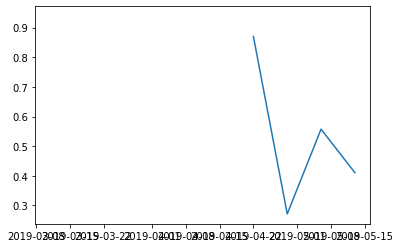

In [85]:
plt.plot(df["timestamp"], df["sentiment"])
plt.show()

In [83]:
#not including zeros in mean 
tdata[tdata["sentiment"] == 0] = np.nan
df = tdata.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')
df

,timestamp,sentiment
0,2019-03-18 00:00:00+00:00,0.938500
1,2019-03-25 00:00:00+00:00,NaN
2,2019-04-01 00:00:00+00:00,NaN
3,2019-04-08 00:00:00+00:00,NaN
4,2019-04-15 00:00:00+00:00,NaN
5,2019-04-22 00:00:00+00:00,NaN
6,2019-04-29 00:00:00+00:00,0.870000
7,2019-05-06 00:00:00+00:00,0.271233
8,2019-05-13 00:00:00+00:00,0.557300
9,2019-05-20 00:00:00+00:00,0.410502


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
side_obj = SentimentIntensityAnalyzer()
def sentiment_scores(x):
    y = side_obj.polarity_scores(x)
    return y["compound"]

In [24]:
data = data.drop(["Unnamed: 0"], axis = 1)
data['timestamp'] = pd.to_datetime(data['timestamp'])
#sentiment score
dsensco = np.zeros(1438604)
for i in range(1438604):
    dsensco[i] = sentiment_scores(data["text"][i])
data["sentiment"] = dsensco
data = data.drop(["text"], axis = 1)
data1 = data
# mean with zeros
data['timestamp'] = pd.to_datetime(data['timestamp']) - pd.to_timedelta(7, unit='d')
df = data.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')
# data1[data1["sentiment" == 0]] = np.nan
# data1['timestamp'] = pd.to_datetime(data1['timestamp']) - pd.to_timedelta(7, unit='d')
# df = data1.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')

<function matplotlib.pyplot.show(close=None, block=None)>

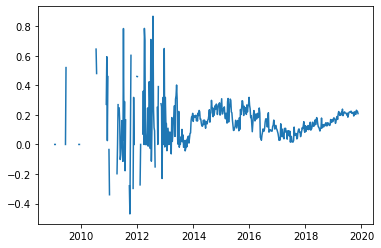

In [30]:
plt.plot(df["timestamp"],df["sentiment"])
plt.show

In [40]:
df

,timestamp,sentiment
0,2009-01-05 00:00:00+00:00,0.000000
1,2009-01-12 00:00:00+00:00,NaN
2,2009-01-19 00:00:00+00:00,0.000000
3,2009-01-26 00:00:00+00:00,0.000000
4,2009-02-02 00:00:00+00:00,NaN
...,...,...
563,2019-10-21 00:00:00+00:00,0.203051
564,2019-10-28 00:00:00+00:00,0.231334
565,2019-11-04 00:00:00+00:00,0.223319
566,2019-11-11 00:00:00+00:00,0.223097


In [21]:
data

,timestamp,text
0,2019-05-27 11:49:06+00:00,Another Test tweet that wasn't caught in the s...
1,2019-05-27 11:49:19+00:00,One of the useful articles of Stefan; here is ...
2,2019-05-21 16:49:45+00:00,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi..."
3,2019-05-22 12:42:16+00:00,BestMixer has been seized by the Dutch Police ...
4,2019-05-27 11:49:30+00:00,Invested my Life Savings into Bitcoin and Ethe...
...,...,...
1438599,2019-11-23 14:35:38+00:00,We are super happy to announce that TZC is add...
1438600,2019-11-18 10:11:08+00:00,Registration is now open for the biggest globa...
1438601,2019-11-23 15:24:08+00:00,$200 #PayPal or #Bitcoin #giveaway \n1) RT thi...
1438602,2019-11-23 15:28:50+00:00,Happy #FibonacciDay \n\nA while back I created...


In [37]:
# Without zeros mean 
data1[data1["sentiment"] == 0] = np.nan
data1['timestamp'] = pd.to_datetime(data1['timestamp']) - pd.to_timedelta(7, unit='d')
df2 = data1.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')

<function matplotlib.pyplot.show(close=None, block=None)>

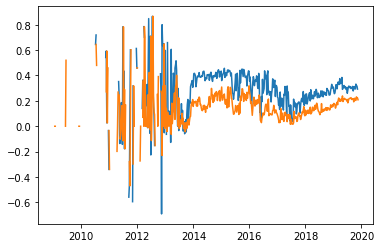

In [46]:
plt.plot(df2["timestamp"],df2["sentiment"])
plt.plot(df["timestamp"],df["sentiment"])
plt.show

In [43]:
df2.to_csv('nozeros.csv', index=False)

# Sentiment for like data

The formula to calculate the weighted sentiment by likes is $\frac{1}{n}\sum_{i=1}^{n}w_ix_i$ where $x_i$ is sentiment and $w_i$ is likes on i:th tweet.

In [1]:
# Imports and data
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('processed_likes.csv')

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
side_obj = SentimentIntensityAnalyzer()
def sentiment_scores(x):
    y = side_obj.polarity_scores(x)
    return y["compound"]

In [18]:
# again testing with test data = tdf
tdf = df[0:99]
#weighted sentiment score
twsenti = np.zeros(len(tdf))
for i in range(len(tdf)):
    twsenti[i] = sentiment_scores(tdf["text"][i])*tdf["likes"][i]
tdf["wsentiment"] = twsenti
tdf = tdf.drop(["text"], axis = 1)
tdf = tdf.drop(["likes"], axis = 1)

c:\users\lamth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
tdf["timestamp"] = pd.to_datetime(tdf['timestamp']) - pd.to_timedelta(7, unit='d')
tdf = tdf.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')
tdf

,timestamp,wsentiment
0,2008-12-22 00:00:00+00:00,0.000000
1,2008-12-29 00:00:00+00:00,NaN
2,2009-01-05 00:00:00+00:00,NaN
3,2009-01-12 00:00:00+00:00,NaN
4,2009-01-19 00:00:00+00:00,NaN
...,...,...
537,2019-04-08 00:00:00+00:00,NaN
538,2019-04-15 00:00:00+00:00,813.450000
539,2019-04-22 00:00:00+00:00,-112.201675
540,2019-04-29 00:00:00+00:00,882.926700


(18001.0, 18039.0)

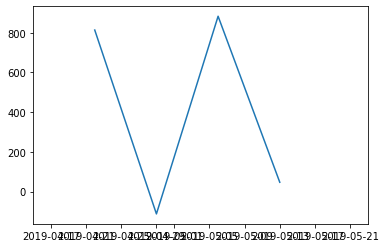

In [34]:
plt.plot(tdf["timestamp"],tdf["wsentiment"])
plt.xlim(pd.Timestamp('2019-04-15'), pd.Timestamp('2019-05-23'))

# Now with the whole data

In [36]:
#weighted sentiment score
twsenti = np.zeros(len(df))
for i in range(len(df)):
    twsenti[i] = sentiment_scores(df["text"][i])*df["likes"][i]
df["wsentiment"] = twsenti
df = df.drop(["text"], axis = 1)
df = df.drop(["likes"], axis = 1)

In [39]:
copy = df
df["timestamp"] = pd.to_datetime(df['timestamp']) - pd.to_timedelta(7, unit='d')
df = df.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')

In [46]:
# ignoring zero wsentiment in the mean 
copy[copy["wsentiment"] == 0] = np.nan
copy['timestamp'] = pd.to_datetime(copy['timestamp']) - pd.to_timedelta(7, unit='d')
copy = copy.resample('W-Mon', on='timestamp').mean().reset_index().sort_values(by='timestamp')

Text(0.5, 1.0, 'blue is the normal one and the yellow is the wsentiment without zero wsentiment calculated in the mean')

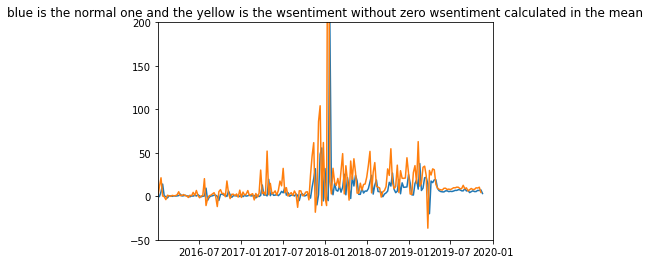

In [71]:
plt.plot(df["timestamp"],df["wsentiment"])
plt.plot(copy["timestamp"],copy["wsentiment"])
plt.ylim(-50,200)
plt.xlim(pd.Timestamp('2016-01-04'), pd.Timestamp('2020-01-01'))
plt.title("blue is the normal one and the yellow is the wsentiment without zero wsentiment calculated in the mean")

In [64]:
df.to_csv('wsentiment.csv',index = False)
copy.to_csv('nozerowsentiment.csv', index = False)

In [2]:
df1 = pd.read_csv("sentimentdata.csv")
df2 = pd.read_csv("nozeros.csv")
df3 = pd.read_csv("wsentiment.csv")
df4 = pd.read_csv("nozerowsentiment.csv")

In [13]:
df1["timestamp"] = pd.to_datetime(df1["timestamp"])
df2["timestamp"] = pd.to_datetime(df2["timestamp"])
df3["timestamp"] = pd.to_datetime(df3["timestamp"])
df4["timestamp"] = pd.to_datetime(df4["timestamp"])

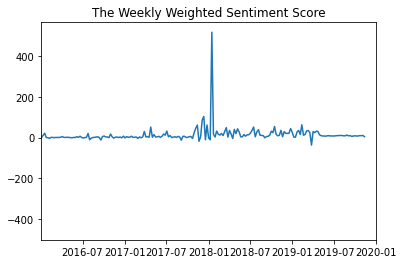

In [29]:
plt.plot(df4["timestamp"],df4["wsentiment"])
plt.xlim(pd.Timestamp('2016-01-04'), pd.Timestamp('2020-01-01'))
plt.title("The Weekly Weighted Sentiment Score")
plt.show
plt.savefig("WeeklyWeightedSentiment")